In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reemplaza 'tu_archivo.csv' con la ruta de tu archivo CSV
df = pd.read_csv('hotel_bookings.csv')


In [18]:
#Detección y eliminación de valores duplicados: 
#Asegúrate de que cada registro en el dataset sea único.
print(df.shape)
antes=df.shape[0]
df.drop_duplicates(inplace=True)
print(df.shape)
despues=df.shape[0]
print(antes-despues)




(119390, 32)
(87396, 32)
31994


In [21]:
#Verificación y ajuste de tipos de datos: Asegúrate de que todas las 
#columnas coincidan con los tipos de datos indicados en el diccionario de datos.
diccionario = {
    'hotel': 'object',  # Categoría o nombre del hotel
    'is_canceled': 'int64',  # 0 o 1 para cancelado/no cancelado
    'lead_time': 'int64',  # Días entre la reserva y la llegada
    'arrival_date_year': 'int64',  # Año de llegada
    'arrival_date_month': 'object',  # Mes como texto o número
    'arrival_date_week_number': 'int64',  # Semana del año
    'arrival_date_day_of_month': 'int64',  # Día del mes
    'stays_in_weekend_nights': 'int64',  # Número de noches en fin de semana
    'stays_in_week_nights': 'int64',  # Número de noches en semana
    'adults': 'int64',  # Número de adultos
    'children': 'float64',  # Número de niños
    'babies': 'int64',  # Número de bebés
    'meal': 'object',  # Tipo de comida reservada
    'country': 'object',  # Código del país
    'market_segment': 'object',  # Segmento de mercado
    'distribution_channel': 'object',  # Canal de distribución
    'is_repeated_guest': 'int64',  # 0 o 1 si es huésped repetido
    'previous_cancellations': 'int64',  # Número de cancelaciones previas
    'previous_bookings_not_canceled': 'int64',  # Reservas previas no canceladas
    'reserved_room_type': 'object',  # Tipo de habitación reservada
    'assigned_room_type': 'object',  # Tipo de habitación asignada
    'booking_changes': 'int64',  # Número de cambios en la reserva
    'deposit_type': 'object',  # Tipo de depósito (No Deposit, Refundable, Non Refundable)
    'agent': 'float64',  # ID del agente de reserva (como float64)
    'company': 'float64',  # ID de la empresa (como float64)
    'days_in_waiting_list': 'int64',  # Días en lista de espera
    'customer_type': 'object',  # Tipo de cliente
    'adr': 'float64',  # Tarifa promedio diaria
    'required_car_parking_spaces': 'int64',  # Espacios de estacionamiento requeridos
    'total_of_special_requests': 'int64',  # Número de solicitudes especiales
    'reservation_status': 'object',  # Estado de la reserva
    'reservation_status_date': 'datetime64[ns]',  # Fecha de estado de la reserva
} #Un diccionario de como me parecio que deben ser los datos

print(df.dtypes) #Podemos ver que hay datos diferentes

for columna, tipo in diccionario.items():
    if columna in df.columns:
        df[columna] = df[columna].astype(tipo)
print(f"Este es el nuevo: \n{df.dtypes}")

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [64]:
# Obtener los nombres de las columnas del DataFrame
columnas_a_verificar = df.columns.tolist()  # Convertir a lista

for columna in columnas_a_verificar:
    # Extraemos los diferentes tipos de entradas de la columna
    unique_values = df[columna].unique().tolist()
    
    # Pongamos todos en minúsculas y sin espacios
    unique_values = [str(value).lower().replace(" ", "") for value in unique_values]
    
    # Verificar si hay elementos repetidos
    repetido = len(unique_values) > len(set(unique_values))
    
    # Imprimir el resultado
    print(f"¿Hay elementos repetidos en la columna '{columna}'? {repetido}") #Si es que se repite algun dato es porque hay alguno que está mal escrito
    



¿Hay elementos repetidos en la columna 'hotel'? False
¿Hay elementos repetidos en la columna 'is_canceled'? False
¿Hay elementos repetidos en la columna 'lead_time'? False
¿Hay elementos repetidos en la columna 'arrival_date_year'? False
¿Hay elementos repetidos en la columna 'arrival_date_month'? False
¿Hay elementos repetidos en la columna 'arrival_date_week_number'? False
¿Hay elementos repetidos en la columna 'arrival_date_day_of_month'? False
¿Hay elementos repetidos en la columna 'stays_in_weekend_nights'? False
¿Hay elementos repetidos en la columna 'stays_in_week_nights'? False
¿Hay elementos repetidos en la columna 'adults'? False
¿Hay elementos repetidos en la columna 'children'? False
¿Hay elementos repetidos en la columna 'babies'? False
¿Hay elementos repetidos en la columna 'meal'? False
¿Hay elementos repetidos en la columna 'country'? False
¿Hay elementos repetidos en la columna 'market_segment'? False
¿Hay elementos repetidos en la columna 'distribution_channel'? False

In [69]:
# como todos son false no hay mal escritos entonces nada que corregir
#Manejo de valores faltantes: Identifica y maneja cualquier valor faltante en el dataset. 
#Rellena los valores faltantes con un marcador adecuado para el tipo de dato.

# Reemplazar None y undefined por NaN
df.replace(to_replace=[None, 'Undefined'], value=np.nan, inplace=True)


vacias = (df == "").sum()

# Imprimir el resultado
print("Celdas vacías en cada columna:")
print(vacias)
#Podemos ver que no hay celdas vacias al haber transformado NULL y undefined y espacios en blancos en NaN

Celdas vacías en cada columna:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                    

In [26]:
#Detección de datos anómalos: Identifica y corrige cualquier punto de dato 
#inapropiado o inusual (por ejemplo, una estancia de 1000 noches).
malanho = ((df['arrival_date_year'] < 2000) | (df['arrival_date_year'] > 2024)).any()
print(f"¿Hay años anómalos? {malanho}")


meses= [
    'JANUARY', 'FEBRUARY', 'MARCH', 'APRIL', 'MAY', 'JUNE',
    'JULY', 'AUGUST', 'SEPTEMBER', 'OCTOBER', 'NOVEMBER', 'DECEMBER'
]
meses = [mes.lower() for mes in meses]
malmes = ~df['arrival_date_month'].str.lower().isin(meses)
mesesnovalidos = malmes.any()
print(f"¿Hay meses no válidos? {mesesnovalidos}")

maldia = ((df['arrival_date_week_number'] < 0) | (df['arrival_date_week_number'] > 300)).any()
print(f"¿Hay cantidad de dias hospedados no válidos? {maldia}")

malfecha = ((df['arrival_date_day_of_month'] < 0) | (df['arrival_date_day_of_month'] > 31)).any()
print(f"¿Hay dia no válidos? {malfecha}")

maladultos = ((df['adults'] < 0) | (df['adults'] > 6)).any()
print(f"¿Hay cantidad de adultos no válidos? {maladultos}")
df.loc[df['adults'] > 6, 'adults'] = np.nan #Corregimos y repetimos analisis
maladultos = ((df['adults'] < 0) | (df['adults'] > 6)).any()
print(f"¿Hay cantidad de adultos no válidos? {maladultos}")

malninhos = ((df['children'] < 0) | (df['children'] > 6)).any()
print(f"¿Hay cantidad de niños no válidos? {malninhos}")
df.loc[df['children'] > 6, 'children'] = np.nan #Corregimos y repetimos analisis
malninhos = ((df['children'] < 0) | (df['children'] > 6)).any()
print(f"¿Hay cantidad de niños no válidos? {malninhos}")

malbebes = ((df['babies'] < 0) | (df['babies'] > 6)).any()
print(f"¿Hay cantidad de bebes no válidos? {malbebes}")
df.loc[df['babies'] > 6, 'babies'] = np.nan #Corregimos y repetimos analisis
malbebes = ((df['babies'] < 0) | (df['babies'] > 6)).any()
print(f"¿Hay cantidad de bebes no válidos? {malbebes}")

¿Hay años anómalos? False
¿Hay meses no válidos? False
¿Hay cantidad de dias hospedados no válidos? False
¿Hay dia no válidos? False
¿Hay cantidad de adultos no válidos? True
¿Hay cantidad de adultos no válidos? False
¿Hay cantidad de niños no válidos? True
¿Hay cantidad de niños no válidos? False
¿Hay cantidad de bebes no válidos? True
¿Hay cantidad de bebes no válidos? False


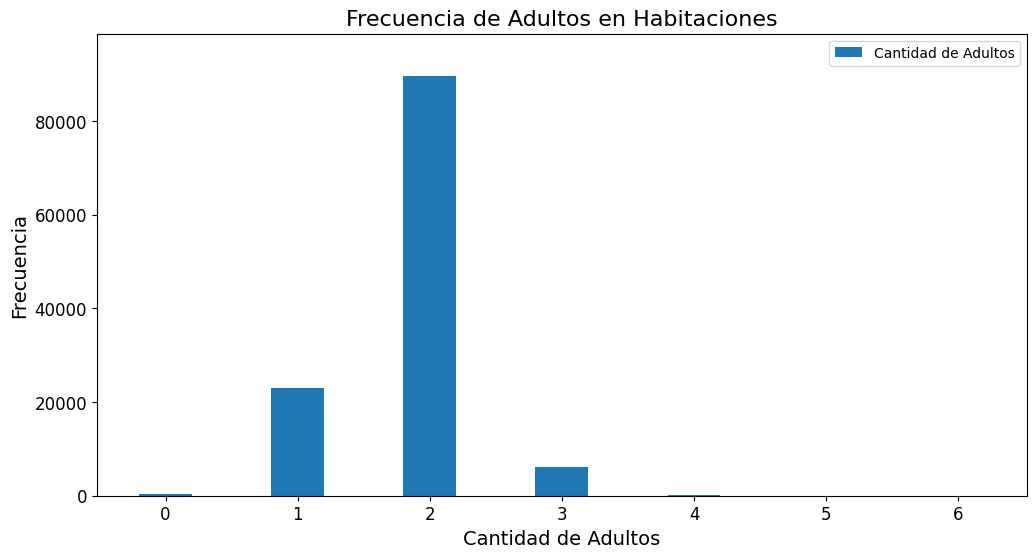

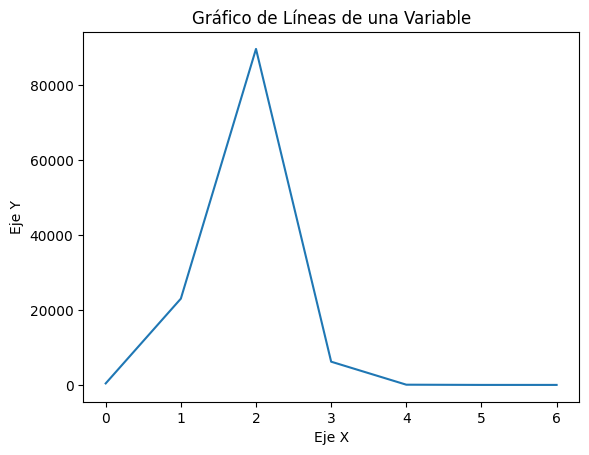

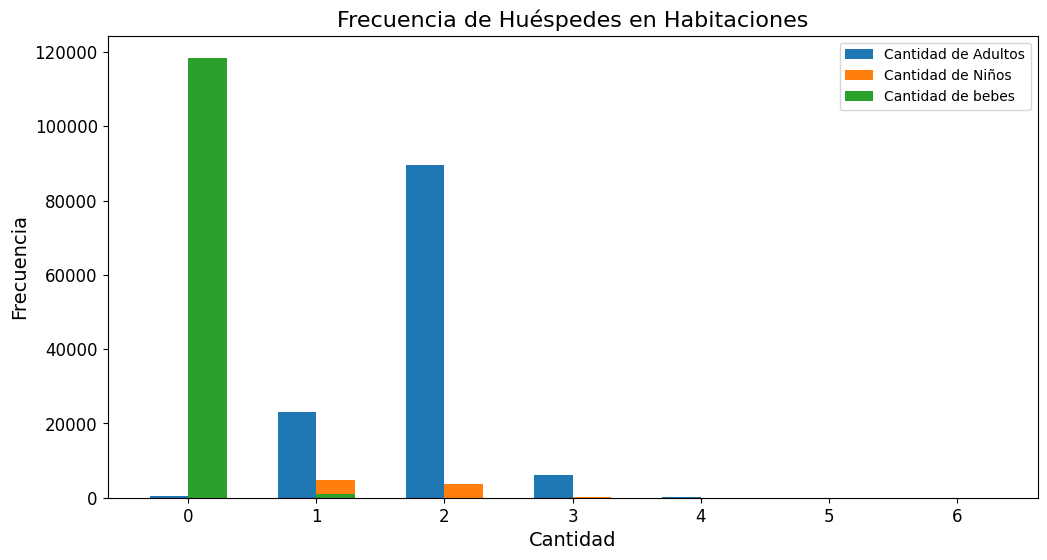

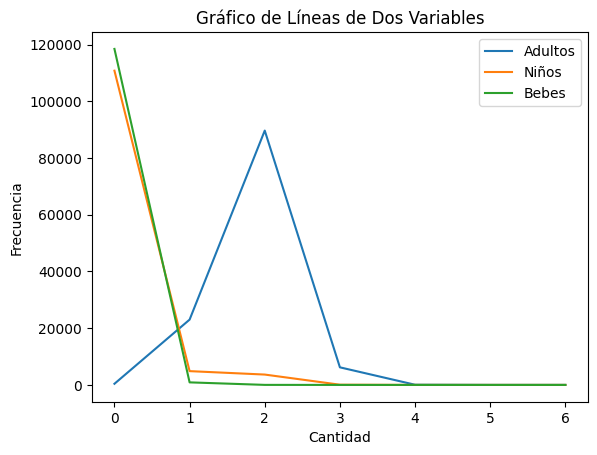

         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            

In [32]:
#Exploración de datos con Python:
#Visualizaciones exploratorias univariadas: Crea dos tipos diferentes de visualizaciones univariadas. 
#Cada visualización debe incluir una breve interpretación dentro del archivo de código.
frecuencias = df["adults"].value_counts().sort_index()
valores = frecuencias.values
categorias = frecuencias.index

# Definir el tamaño de la figura
plt.figure(figsize=(12, 6))  # Ajusta el tamaño (ancho, alto) según sea necesario

# Crear el gráfico de barras
plt.bar(categorias, valores, width=0.4, label='Cantidad de Adultos')
plt.title("Frecuencia de Adultos en Habitaciones", fontsize=16)
plt.xlabel("Cantidad de Adultos", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(categorias, fontsize=12)
plt.yticks(fontsize=12)

# Ajustar el límite del eje y si es necesario
plt.ylim(0, max(valores) * 1.1)  # Ajusta el límite superior un 10% por encima del máximo

plt.legend()
plt.show()

# Crear el gráfico de líneas
plt.plot(categorias, valores)
plt.title("Gráfico de Líneas de una Variable")
plt.xlabel("Eje X")
plt.ylabel("Eje Y")
plt.show() # Los adultos se hospedan mas de dos y solos

frecuencias2 = df["children"].value_counts().sort_index()
frecuencias3 = df["babies"].value_counts().sort_index()
categorias=np.arange(0, 7)
valores2 = [frecuencias2.get(i, 0) for i in categorias]  # Frecuencias de niños
valores3 = [frecuencias3.get(i, 0) for i in categorias]  # Frecuencias de bebes
# Convertir listas a arrays de NumPy
valores = np.array(valores)
valores2 = np.array(valores2)
valores3 = np.array(valores3)

# Definir el tamaño de la figura
plt.figure(figsize=(12, 6))

# Crear el gráfico de barras
width = 0.3  # Ancho de las barras

# Gráfico para adultos
plt.bar(categorias - width / 2, valores, width=width, label='Cantidad de Adultos')

# Gráfico para niños
plt.bar(categorias + width / 2, valores2, width=width, label='Cantidad de Niños')
# Gráfico para bebes
plt.bar(categorias + width / 2, valores3, width=width, label='Cantidad de bebes')

# Configuraciones del gráfico
plt.title("Frecuencia de Huéspedes en Habitaciones", fontsize=16)
plt.xlabel("Cantidad", fontsize=14)
plt.ylabel("Frecuencia", fontsize=14)
plt.xticks(categorias, fontsize=12)  # Categorías del 1 al 6
plt.yticks(fontsize=12)
plt.legend()

# Mostrar el gráfico
plt.show()
# Crear el gráfico de líneas con dos variables
plt.plot(categorias, valores, label='Adultos')
plt.plot(categorias, valores2, label='Niños')
plt.plot(categorias, valores3, label="Bebes")
plt.title("Gráfico de Líneas de Dos Variables")
plt.xlabel("Cantidad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()



#Visualizaciones exploratorias multivariadas: Crea dos tipos diferentes de visualizaciones multivariadas. 
#Cada visualización debe incluir una breve interpretación dentro del archivo de código.

#Podemos observar que la mayoria son 2 adultos y 1 adulto lo que se hospedan
# En cambio la mayoria van sin niños ni bebes

In [33]:
#Análisis adicional:
#Estadísticas descriptivas: Proporciona un resumen estadístico del dataset, incluyendo medidas de tendencia 
# central y dispersión para las variables numéricas.

print(df.describe())


#Identificación de tendencias: Analiza y discute cualquier tendencia notable que observes en los datos, apoyándote 
#en las visualizaciones y estadísticas descriptivas.

#Podemos observar que la mayoria son 2 adultos y 1 adulto lo que se hospedan
# En cambio la mayoria van sin niños ni bebes

    """
    
    El huésped que más noches se quedó durante el fin de semana se quedó 19 noches
    El 75% de los huéspedes se quedan 2 noches o menos. Esto indica que es menos común que se queden más de 2 noches durante el fin de semana.
    La mitad de los huéspedes se quedan 1 noche o menos durante el fin de semana
    Una desviación estándar de aproximadamente 0.40 muestra que hay un poco de dispersión,
    pero no es importante dado que el promedio es bajo.
    El 25% de las reservas no tienen niños.
    
    
    Es una base de datos bastante completa y extensa y con la funcion describe() obtenemos
    los analisis estadisticos mas importantes con lo cual se puede obtener bastantes datos
    y resultados, pudiendo asi tomar desiciones basandose en datos concretos, bien estudiados
    y muy completos
    """


         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000            